# Karata Clup Networks

In [84]:
#%matplotlib notebook

import networkx as nx
from networkx.algorithms import community
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
import numpy as np

# Load the graph from the pickle file
G = nx.karate_club_graph()

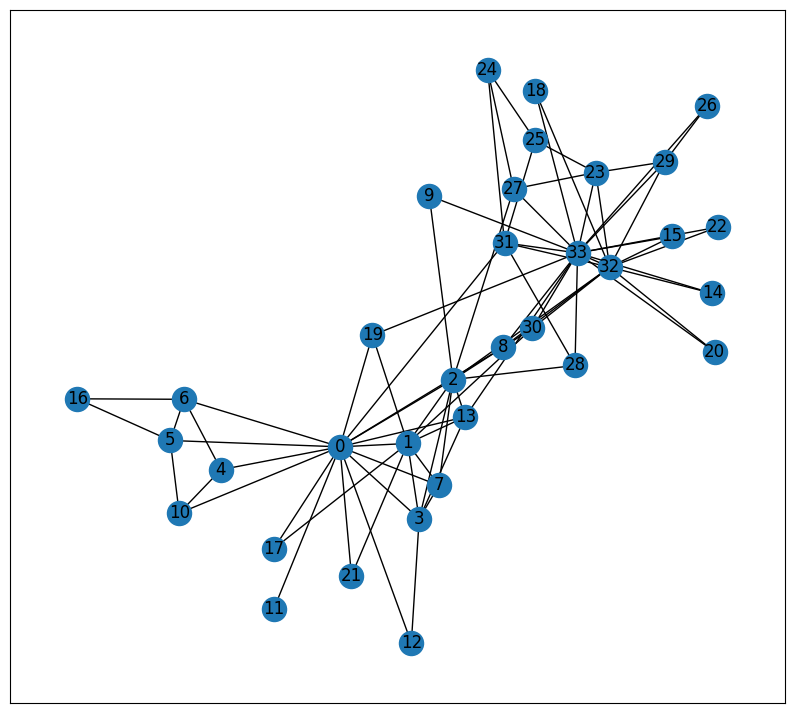

In [85]:
# draw the graph using the default spring layout
plt.figure(figsize=(10,9))
nx.draw_networkx(G)

In [86]:
# See what layouts are available in networkX
[x for x in nx.__dir__() if x.endswith('_layout')]

['bipartite_layout',
 'circular_layout',
 'forceatlas2_layout',
 'kamada_kawai_layout',
 'random_layout',
 'rescale_layout',
 'shell_layout',
 'spring_layout',
 'spectral_layout',
 'planar_layout',
 'fruchterman_reingold_layout',
 'spiral_layout',
 'multipartite_layout',
 'bfs_layout',
 'arf_layout']

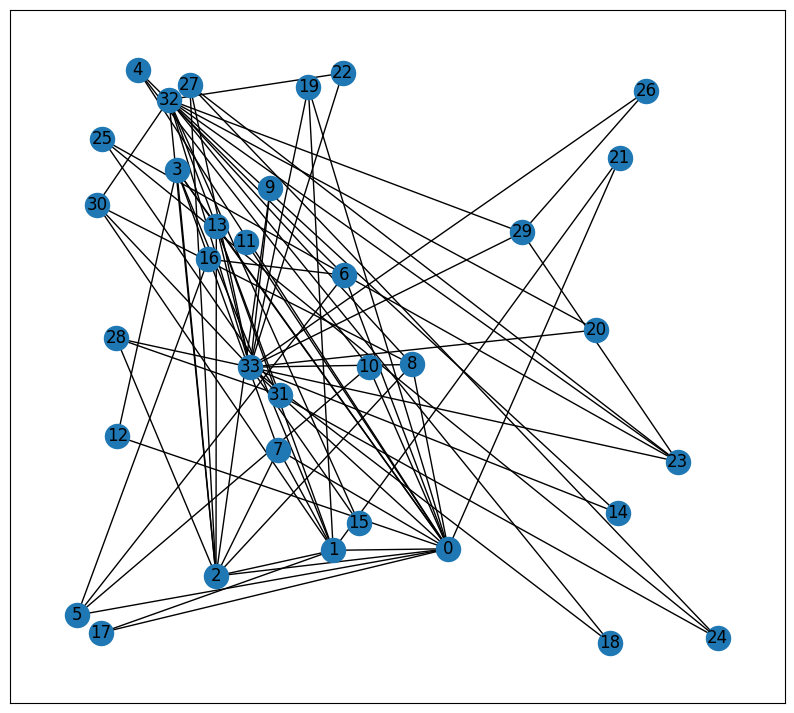

In [87]:
# Draw the graph using the random layout
plt.figure(figsize=(10,9))
pos = nx.random_layout(G)
nx.draw_networkx(G, pos)

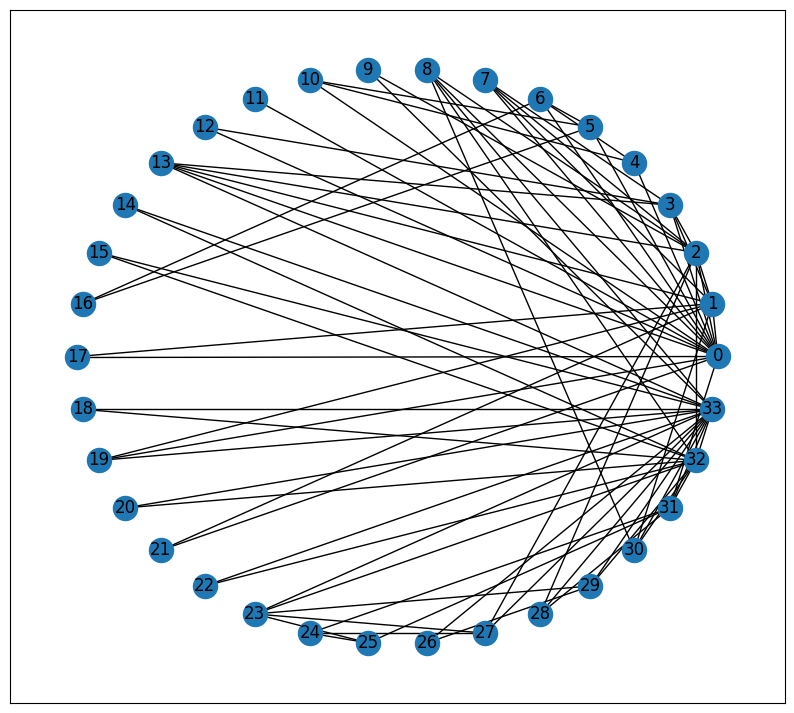

In [88]:
# Draw the graph using the circular layout
plt.figure(figsize=(10,9))
pos = nx.circular_layout(G)
nx.draw_networkx(G, pos)

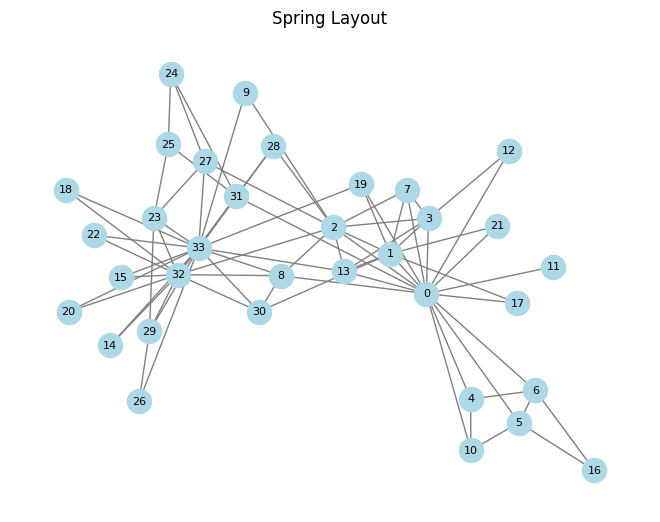

In [89]:
# Spring layout
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', font_size=8)
plt.title("Spring Layout")
plt.show()


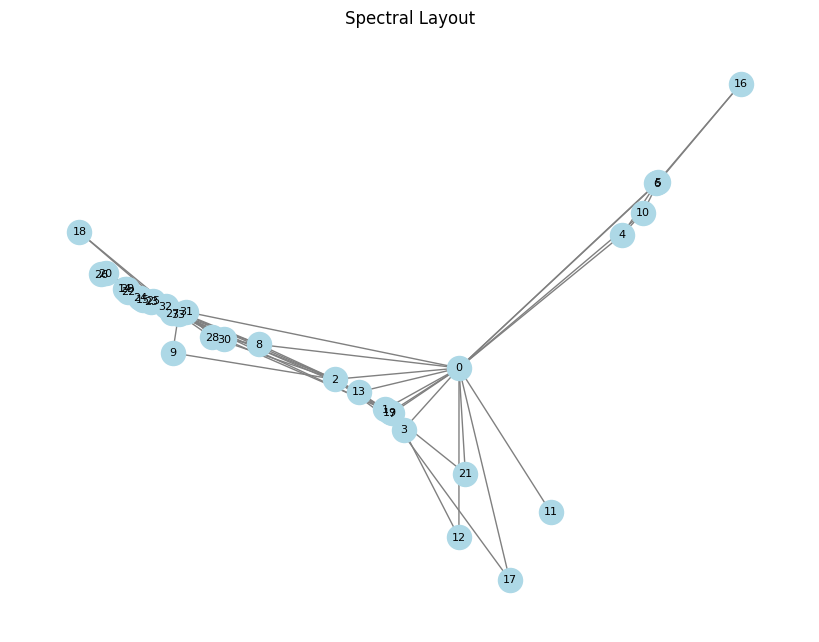

In [104]:
# Spectral layout
pos = nx.spectral_layout(G)
plt.figure(figsize=(8, 6))
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', font_size=8)
plt.title("Spectral Layout")
plt.show()

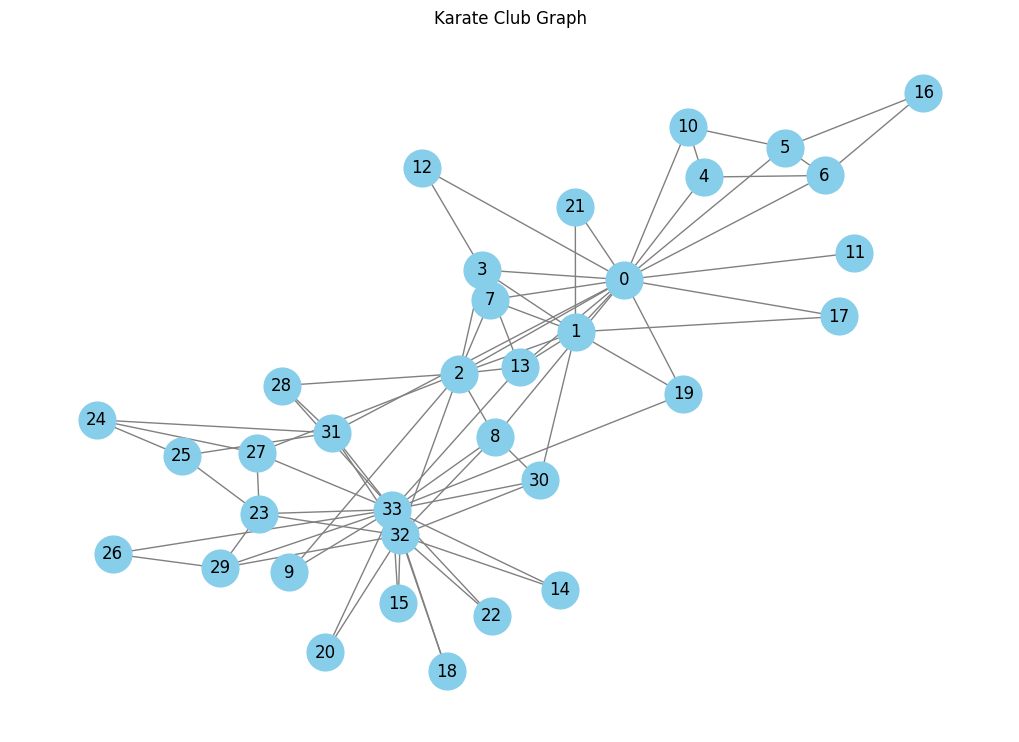

In [91]:
# Draw the graph
plt.figure(figsize=(10, 7))
nx.draw(G, with_labels=True, node_color='skyblue', node_size=700, edge_color='gray')
plt.title('Karate Club Graph')
plt.show()

In [92]:
# Calculate centrality measures
degree_centrality = nx.degree_centrality(G)
closeness_centrality = nx.closeness_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)

# Define node colors and sizes based on centrality measures
node_color = [closeness_centrality[n] for n in G.nodes()]
node_size = [10000 * betweenness_centrality[n] for n in G.nodes()]

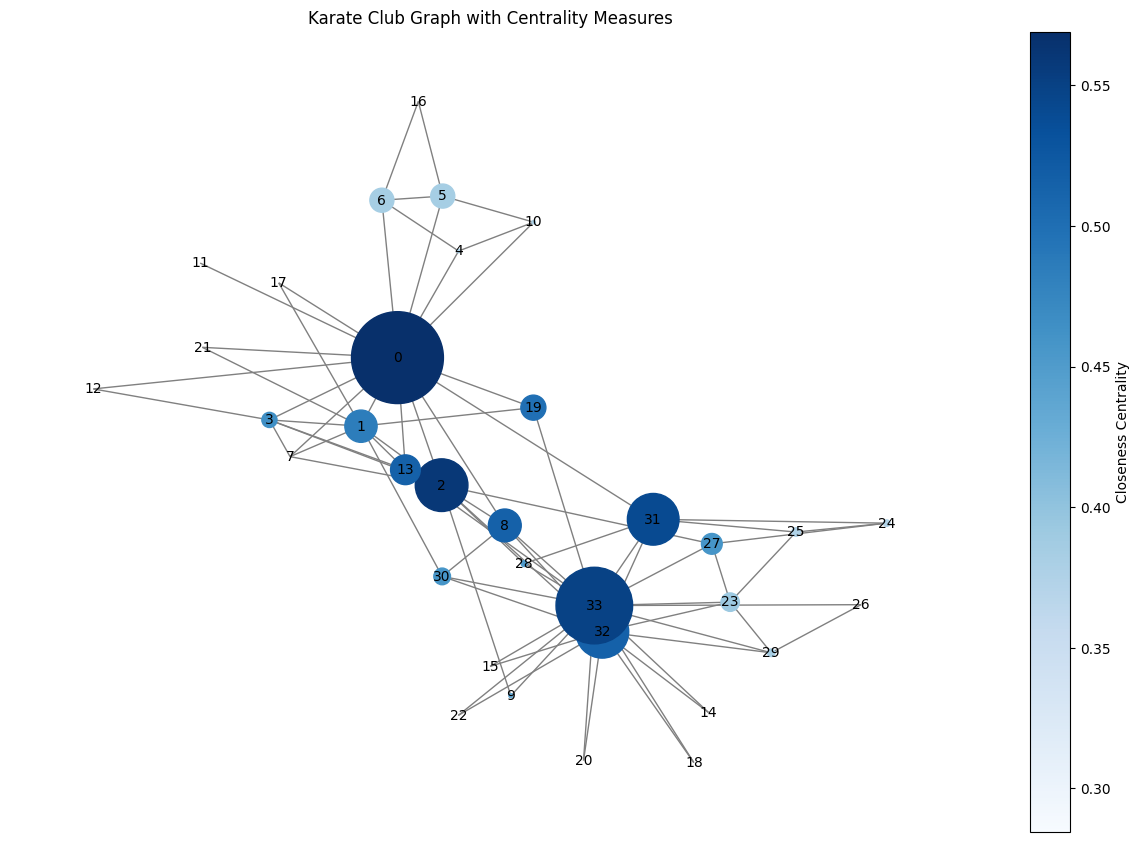

In [93]:
# Draw the graph with a spring layout
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, seed=42)  # Seed for reproducibility
nx.draw(G, pos, with_labels=True, node_color=node_color, node_size=node_size, cmap=plt.cm.Blues, edge_color='gray', font_size=10)
plt.title('Karate Club Graph with Centrality Measures')
sm = plt.cm.ScalarMappable(cmap=plt.cm.Blues, norm=plt.Normalize(vmin=min(node_color), vmax=max(node_color)))
sm.set_array([])
plt.colorbar(sm, label='Closeness Centrality', ax=plt.gca())
plt.show()

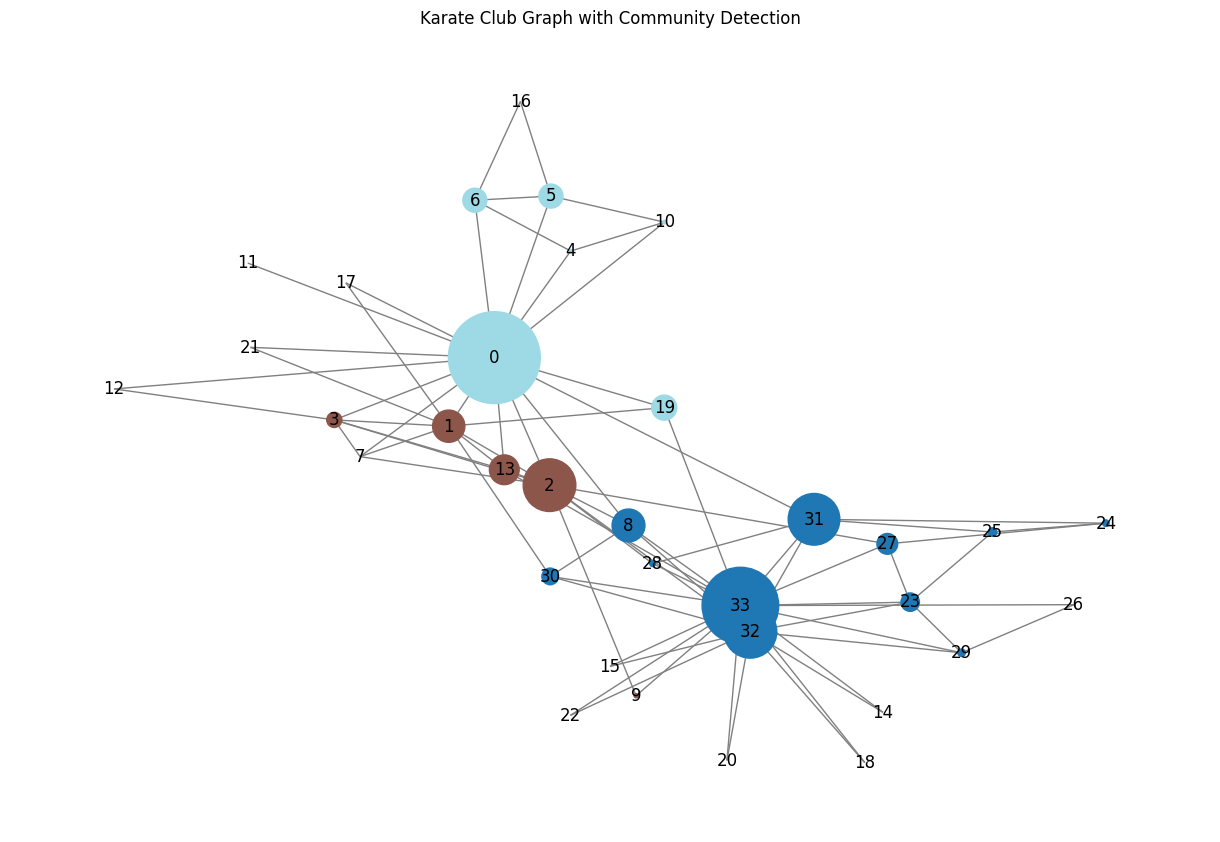

In [94]:
# Community detection
communities = community.greedy_modularity_communities(G)
community_map = {}
for i, community in enumerate(communities):
    for node in community:
        community_map[node] = i

# Draw the graph with community colors
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, seed=42)  # Seed for reproducibility
colors = [community_map[n] for n in G.nodes()]
nx.draw(G, pos, node_color=colors, node_size=node_size, cmap=plt.cm.tab20, with_labels=True, edge_color='gray')
plt.title('Karate Club Graph with Community Detection')
plt.show()

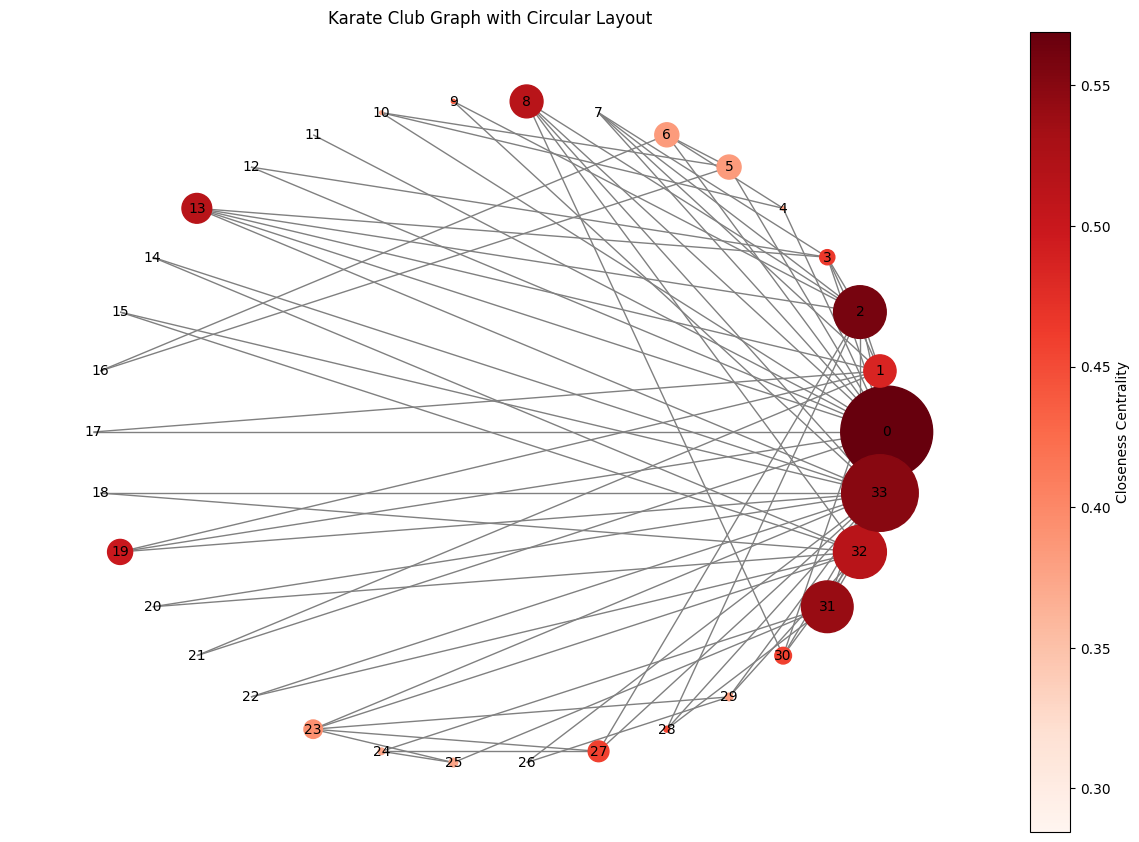

In [95]:
# Draw the graph with a circular layout
plt.figure(figsize=(12, 8))
pos = nx.circular_layout(G)
nx.draw(G, pos, with_labels=True, node_color=node_color, node_size=node_size, cmap=plt.cm.Reds, edge_color='gray', font_size=10)
plt.title('Karate Club Graph with Circular Layout')
sm = plt.cm.ScalarMappable(cmap=plt.cm.Reds, norm=plt.Normalize(vmin=min(node_color), vmax=max(node_color)))
sm.set_array([])
plt.colorbar(sm, label='Closeness Centrality', ax=plt.gca())
plt.show()

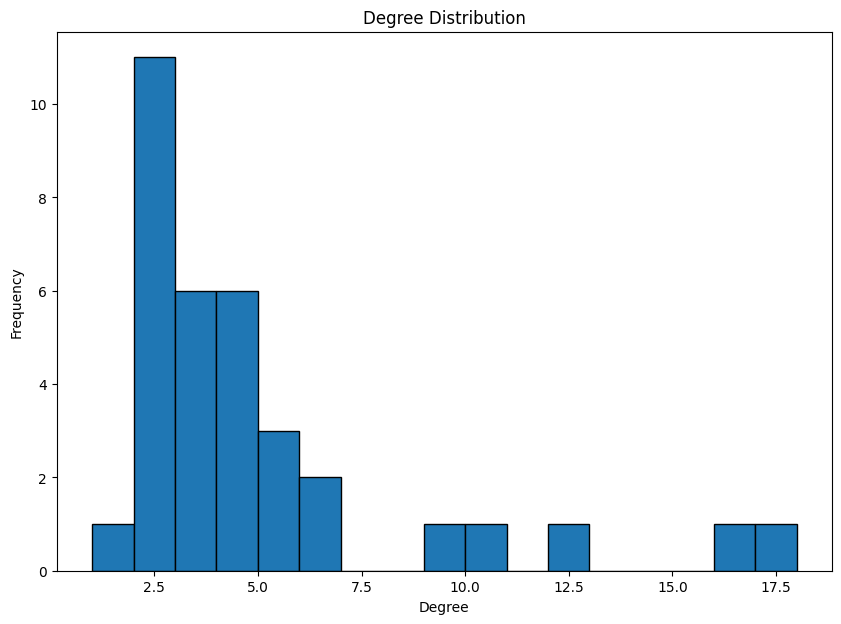

In [96]:
# Degree distribution
degrees = [G.degree(n) for n in G.nodes()]
plt.figure(figsize=(10, 7))
plt.hist(degrees, bins=range(1, max(degrees)+2), edgecolor='black')
plt.title('Degree Distribution')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.show()


In [97]:
# Print centrality measures for the first 5 nodes
print("Degree Centrality:", list(degree_centrality.items())[:5])
print("Closeness Centrality:", list(closeness_centrality.items())[:5])
print("Betweenness Centrality:", list(betweenness_centrality.items())[:5])

Degree Centrality: [(0, 0.48484848484848486), (1, 0.2727272727272727), (2, 0.30303030303030304), (3, 0.18181818181818182), (4, 0.09090909090909091)]
Closeness Centrality: [(0, 0.5689655172413793), (1, 0.4852941176470588), (2, 0.559322033898305), (3, 0.4647887323943662), (4, 0.3793103448275862)]
Betweenness Centrality: [(0, 0.43763528138528146), (1, 0.053936688311688304), (2, 0.14365680615680618), (3, 0.011909271284271283), (4, 0.0006313131313131313)]


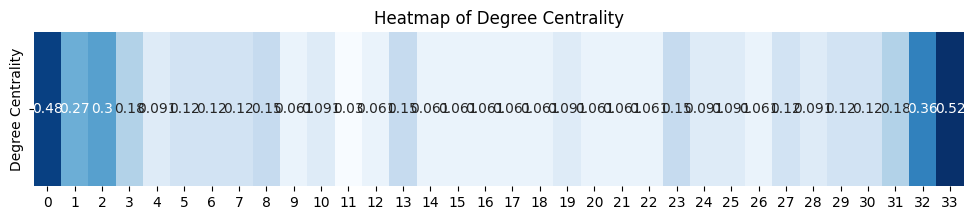

In [98]:
# Degree centrality heatmap
degree_values = np.array([degree_centrality[n] for n in G.nodes()])
degree_matrix = degree_values.reshape(1, -1)

plt.figure(figsize=(12, 2))
sns.heatmap(degree_matrix, annot=True, cmap='Blues', cbar=False, xticklabels=G.nodes(), yticklabels=['Degree Centrality'])
plt.title('Heatmap of Degree Centrality')
plt.show()


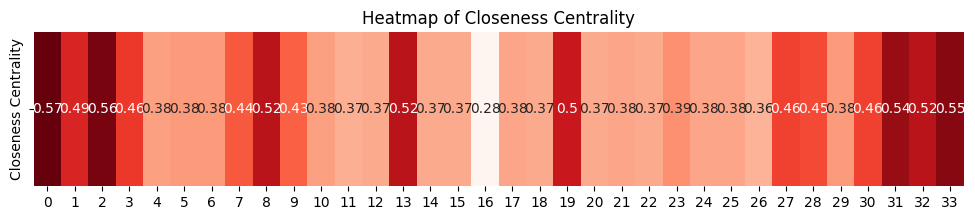

In [99]:
# Closeness centrality heatmap
closeness_values = np.array([closeness_centrality[n] for n in G.nodes()])
closeness_matrix = closeness_values.reshape(1, -1)

plt.figure(figsize=(12, 2))
sns.heatmap(closeness_matrix, annot=True, cmap='Reds', cbar=False, xticklabels=G.nodes(), yticklabels=['Closeness Centrality'])
plt.title('Heatmap of Closeness Centrality')
plt.show()


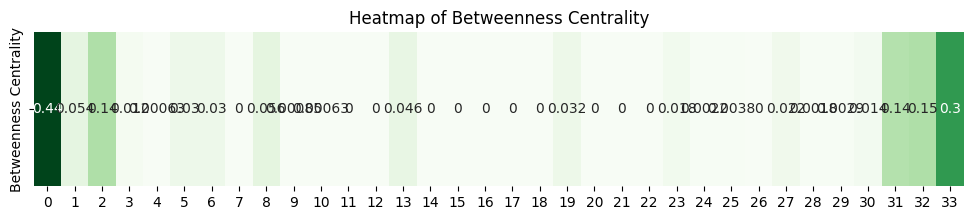

In [100]:
# Betweenness centrality heatmap
betweenness_values = np.array([betweenness_centrality[n] for n in G.nodes()])
betweenness_matrix = betweenness_values.reshape(1, -1)

plt.figure(figsize=(12, 2))
sns.heatmap(betweenness_matrix, annot=True, cmap='Greens', cbar=False, xticklabels=G.nodes(), yticklabels=['Betweenness Centrality'])
plt.title('Heatmap of Betweenness Centrality')
plt.show()

In [101]:
node_degree = dict(G.degree())
print("Node Degree:", node_degree)

Node Degree: {0: 16, 1: 9, 2: 10, 3: 6, 4: 3, 5: 4, 6: 4, 7: 4, 8: 5, 9: 2, 10: 3, 11: 1, 12: 2, 13: 5, 14: 2, 15: 2, 16: 2, 17: 2, 18: 2, 19: 3, 20: 2, 21: 2, 22: 2, 23: 5, 24: 3, 25: 3, 26: 2, 27: 4, 28: 3, 29: 4, 30: 4, 31: 6, 32: 12, 33: 17}


In [105]:
average_degree = sum(dict(G.degree()).values()) / G.number_of_nodes()
print("Average Degree:", average_degree)

Average Degree: 4.588235294117647


In [106]:
complete_graph = nx.complete_graph(5)
star_graph = nx.star_graph(4)

print("Complete Graph Edges:", complete_graph.edges())
print("Star Graph Edges:", star_graph.edges())


Complete Graph Edges: [(0, 1), (0, 2), (0, 3), (0, 4), (1, 2), (1, 3), (1, 4), (2, 3), (2, 4), (3, 4)]
Star Graph Edges: [(0, 1), (0, 2), (0, 3), (0, 4)]


In [107]:
is_connected = nx.is_connected(G)
print("Is the Karate Club Graph connected?", is_connected)

Is the Karate Club Graph connected? True


In [108]:
adj_matrix = nx.adjacency_matrix(G).todense()
print("Adjacency Matrix:\n", adj_matrix)

Adjacency Matrix:
 [[0 4 5 ... 2 0 0]
 [4 0 6 ... 0 0 0]
 [5 6 0 ... 0 2 0]
 ...
 [2 0 0 ... 0 4 4]
 [0 0 2 ... 4 0 5]
 [0 0 0 ... 4 5 0]]


In [110]:
edge_list = list(G.edges(data=True))
adj_list = {n: list(G.neighbors(n)) for n in G.nodes()}
print("Edge List:", edge_list)
print("Adjacent List:", adj_list)

Edge List: [(0, 1, {'weight': 4}), (0, 2, {'weight': 5}), (0, 3, {'weight': 3}), (0, 4, {'weight': 3}), (0, 5, {'weight': 3}), (0, 6, {'weight': 3}), (0, 7, {'weight': 2}), (0, 8, {'weight': 2}), (0, 10, {'weight': 2}), (0, 11, {'weight': 3}), (0, 12, {'weight': 1}), (0, 13, {'weight': 3}), (0, 17, {'weight': 2}), (0, 19, {'weight': 2}), (0, 21, {'weight': 2}), (0, 31, {'weight': 2}), (1, 2, {'weight': 6}), (1, 3, {'weight': 3}), (1, 7, {'weight': 4}), (1, 13, {'weight': 5}), (1, 17, {'weight': 1}), (1, 19, {'weight': 2}), (1, 21, {'weight': 2}), (1, 30, {'weight': 2}), (2, 3, {'weight': 3}), (2, 7, {'weight': 4}), (2, 8, {'weight': 5}), (2, 9, {'weight': 1}), (2, 13, {'weight': 3}), (2, 27, {'weight': 2}), (2, 28, {'weight': 2}), (2, 32, {'weight': 2}), (3, 7, {'weight': 3}), (3, 12, {'weight': 3}), (3, 13, {'weight': 3}), (4, 6, {'weight': 2}), (4, 10, {'weight': 3}), (5, 6, {'weight': 5}), (5, 10, {'weight': 3}), (5, 16, {'weight': 3}), (6, 16, {'weight': 3}), (8, 30, {'weight': 3})

In [111]:
clustering_coefficient = nx.clustering(G)
average_clustering_coefficient = nx.average_clustering(G)
print("Clustering Coefficient:", clustering_coefficient)
print("Average Clustering Coefficient:", average_clustering_coefficient)

Clustering Coefficient: {0: 0.15, 1: 0.3333333333333333, 2: 0.24444444444444444, 3: 0.6666666666666666, 4: 0.6666666666666666, 5: 0.5, 6: 0.5, 7: 1.0, 8: 0.5, 9: 0, 10: 0.6666666666666666, 11: 0, 12: 1.0, 13: 0.6, 14: 1.0, 15: 1.0, 16: 1.0, 17: 1.0, 18: 1.0, 19: 0.3333333333333333, 20: 1.0, 21: 1.0, 22: 1.0, 23: 0.4, 24: 0.3333333333333333, 25: 0.3333333333333333, 26: 1.0, 27: 0.16666666666666666, 28: 0.3333333333333333, 29: 0.6666666666666666, 30: 0.5, 31: 0.2, 32: 0.19696969696969696, 33: 0.11029411764705882}
Average Clustering Coefficient: 0.5706384782076823


In [112]:
print("Degree Centrality:", degree_centrality)
print("Closeness Centrality:", closeness_centrality)
print("Betweenness Centrality:", betweenness_centrality)

Degree Centrality: {0: 0.48484848484848486, 1: 0.2727272727272727, 2: 0.30303030303030304, 3: 0.18181818181818182, 4: 0.09090909090909091, 5: 0.12121212121212122, 6: 0.12121212121212122, 7: 0.12121212121212122, 8: 0.15151515151515152, 9: 0.06060606060606061, 10: 0.09090909090909091, 11: 0.030303030303030304, 12: 0.06060606060606061, 13: 0.15151515151515152, 14: 0.06060606060606061, 15: 0.06060606060606061, 16: 0.06060606060606061, 17: 0.06060606060606061, 18: 0.06060606060606061, 19: 0.09090909090909091, 20: 0.06060606060606061, 21: 0.06060606060606061, 22: 0.06060606060606061, 23: 0.15151515151515152, 24: 0.09090909090909091, 25: 0.09090909090909091, 26: 0.06060606060606061, 27: 0.12121212121212122, 28: 0.09090909090909091, 29: 0.12121212121212122, 30: 0.12121212121212122, 31: 0.18181818181818182, 32: 0.36363636363636365, 33: 0.5151515151515151}
Closeness Centrality: {0: 0.5689655172413793, 1: 0.4852941176470588, 2: 0.559322033898305, 3: 0.4647887323943662, 4: 0.3793103448275862, 5: 0

## Conclusion

In this analysis, we explored various aspects of the Karate Club graph using NetworkX and Matplotlib. We covered the following key points:

1. **Node Degree and Average Degree**:
   - We calculated the degree of each node and the average degree of the graph, providing insights into the connectivity of the network.

2. **Special Graphs**:
   - We examined examples of special graphs, such as complete graphs and star graphs, to understand different network structures.

3. **Connectivity of Graphs**:
   - We verified that the Karate Club graph is connected, ensuring that there is a path between any pair of nodes.

4. **Matrix Representation**:
   - We represented the graph using an adjacency matrix, which is useful for various matrix-based computations.

5. **Graph Representation**:
   - We provided both edge list and adjacency list representations of the graph, highlighting different ways to store and manipulate graph data.

6. **Quantifying Social Structure**:
   - We calculated the clustering coefficient and average clustering coefficient to quantify the tendency of nodes to cluster together.

7. **Centrality Measures**:
   - We computed various centrality measures, including degree centrality, closeness centrality, betweenness centrality, and eigenvector centrality, to identify the most important nodes in the network.

8. **Visualizations**:
   - We enhanced the graph visualization by varying edges based on weight and creating heatmaps to show the distribution of node attributes.

These analyses and visualizations provide a comprehensive understanding of the structure and properties of the Karate Club graph. By leveraging these techniques, we can gain valuable insights into the dynamics of social networks and other complex systems.

Feel free to explore further and apply these methods to other datasets to uncover more interesting patterns and relationships!

---

*This analysis was conducted using Python libraries NetworkX and Matplotlib. The code and visualizations can be easily adapted for other types of graphs and networks.*
